In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
# Read the data
edges_df = pd.read_csv('../Data/edges.csv')
nodes_df = pd.read_csv('../Data/nodes.csv')

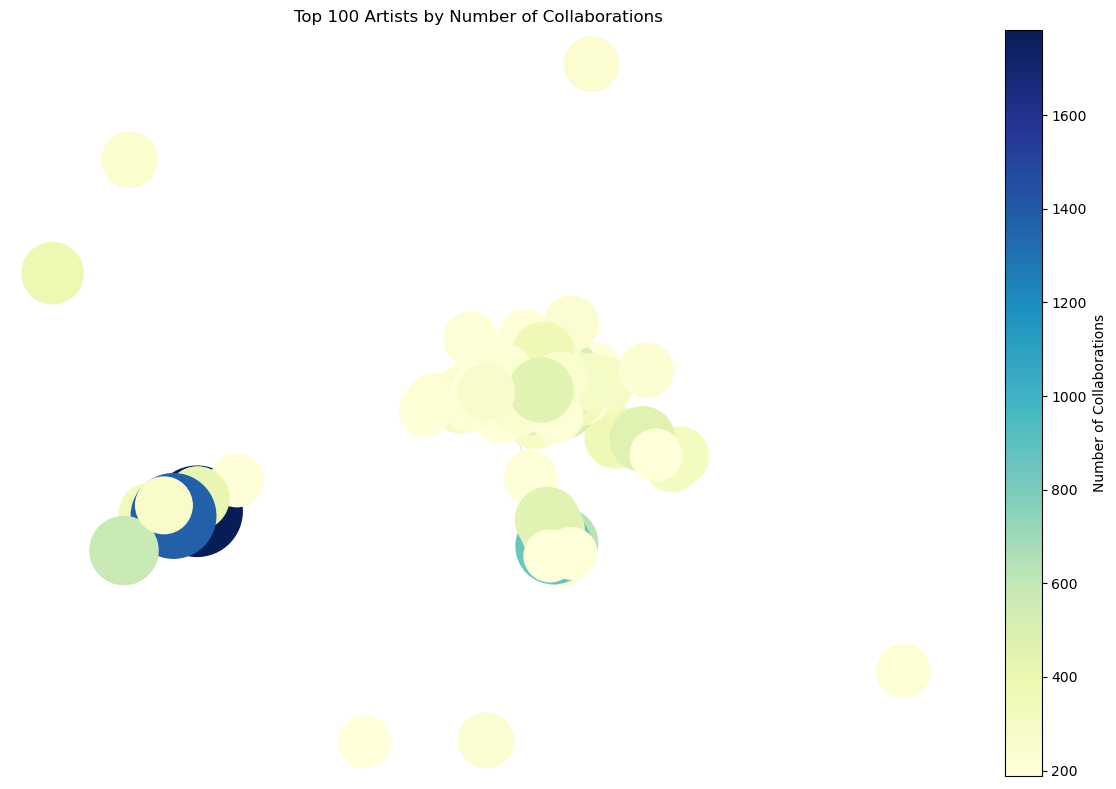

In [6]:
# Create the network
G = nx.from_pandas_edgelist(edges_df, 'id_0', 'id_1')

# Take the top 100 artists by degree
degrees = dict(G.degree())
top_artists = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:100]
top_artist_ids = [artist[0] for artist in top_artists]

# Create a subgraph of just these artists
G_sub = G.subgraph(top_artist_ids)

# Set up the plot
plt.figure(figsize=(12, 8))

# Draw the network
pos = nx.spring_layout(G_sub)
node_sizes = [np.sqrt(degrees[node])*100 for node in G_sub.nodes()]
node_colors = [degrees[node] for node in G_sub.nodes()]

# Draw edges
nx.draw_networkx_edges(G_sub, pos, alpha=0.2, edge_color='gray')

# Draw nodes
nodes = nx.draw_networkx_nodes(G_sub, pos, 
                             node_size=node_sizes,
                             node_color=node_colors,
                             cmap=plt.cm.YlGnBu)

plt.colorbar(nodes, label='Number of Collaborations')
plt.title('Top 100 Artists by Number of Collaborations')
plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Print top 10 most connected artists
print("\n=== Top 10 Most Connected Artists ===")
for artist_id, degree in top_artists[:10]:
    artist_name = nodes_df[nodes_df['spotify_id'] == artist_id]['name'].iloc[0]
    print(f"{artist_name}: {degree} collaborations")


=== Top 10 Most Connected Artists ===
Johann Sebastian Bach: 1781 collaborations
Traditional: 1371 collaborations
Mc Gw: 858 collaborations
MC MN: 632 collaborations
Jean Sibelius: 580 collaborations
Armin van Buuren: 513 collaborations
Gucci Mane: 509 collaborations
Steve Aoki: 498 collaborations
Snoop Dogg: 495 collaborations
Diplo: 494 collaborations


Does focusing on one genre vs multiple genres help?